In [7]:
#Añade Sol Informe para analizar el BodySim.
#Tan solo hay que ejecutarlo una vez, si se genera una simulación nueva con EEMS.
import numpy as np
import datetime as dt
import netCDF4

print('Add Synthetic Sun to BodySim')
bodyfile='Washington-1m-2008-09_UGRID.nc' 
simbody = netCDF4.Dataset(bodyfile,"a")   
time= np.array(simbody['time'])
refstr=simbody['time'].units
refdate=dt.datetime.fromisoformat(refstr[-19:])
dtini=refdate+dt.timedelta(seconds=time[0]*24*3600)
dtend=refdate+dt.timedelta(seconds=time[-1]*24*3600)
T=(time-time[0])*24*3600
vsun=np.maximum(np.cos((T/60/60+12)/24*2*np.pi),np.zeros(len(T)))
sun = simbody.createVariable("sun","f8",("TIME",))
sun[:]=vsun
simbody.close()
print('sun variable added to the file.')


Añade Sun a BodySim (Solo una vez)


RuntimeError: NetCDF: String match to name in use

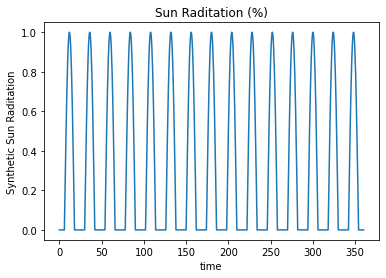

In [6]:
#Comprobar que ya tiene sol sintético.
import numpy as np
import datetime as dt
import netCDF4
import matplotlib.pyplot as plt
#Check the sun
bodyfile='..\Washington-1m-2008-09_UGRID.nc'
simbody = netCDF4.Dataset(bodyfile)   
mysun=np.array(simbody['sun'])
time= np.array(simbody['time'])
refstr=simbody['time'].units
refdate=dt.datetime.fromisoformat(refstr[-19:])
dtini=refdate+dt.timedelta(seconds=time[0]*24*3600)
dtend=refdate+dt.timedelta(seconds=time[-1]*24*3600)
T=(time-time[0])*24*3600

plt.plot(T/60/60,mysun)
plt.xlabel('time (h)'), 
plt.ylabel('Synthetic Sun Raditation')
plt.title('Sun Raditation (%)')
plt.show()

simbody.close()

